# Gradient vector fields
A **gradient vector field** is a vector field given as the gradient of a function.

Here we plot the gradient vector field
$\nabla f$ where $f(x) = \sigma(w\cdot x)$ for $x\in\mathbb R^2$ where $w\in\mathbb R^2$ and $\sigma$ is the sigmoid function.

---
tags: pytorch, tutorial, gradient, vector field, automatic differentiation, visualization

# Imports

In [1]:
import numpy as np
import torch

import matplotlib.pyplot as plt
%matplotlib inline

# Compute gradient on a meshgrid

In [2]:
w = torch.tensor([-2., 3.])

x_min, x_max, y_min, y_max = -1, 1, -1, 1
n = 11
y, x = np.mgrid[y_min:y_max:n*1j, x_min:x_max:n*1j]
x = torch.tensor(x, requires_grad=True)
y = torch.tensor(y, requires_grad=True)
xy = torch.stack([x, y], -1).reshape(n*n,2)

z = (w*xy).sum(1)
z = z.sigmoid()

z.backward(torch.ones_like(z))
gradf_x, gradf_y = x.grad, y.grad

# Visualization

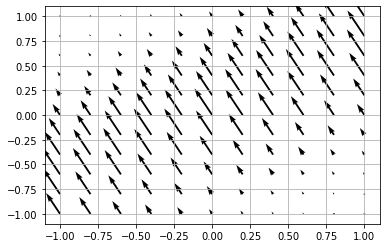

In [3]:
fig, ax = plt.subplots()

X = x.detach().numpy()
Y = y.detach().numpy()
U = gradf_x.detach().numpy()
V = gradf_y.detach().numpy()

sc = .2


ax.quiver(X, Y, sc*U, sc*V)

ax.grid();
ax;